# Ordinary least squares (OLS)


https://lectures.quantecon.org/py/ols.html
https://people.richland.edu/james/ictcm/2004/multiple.html


## Linear Model

$Y_t = \alpha + \beta X_t + \epsilon_t $

$\epsilon_t$ is error process

The relationship between dependent and explanatory variables using linear equation
 
The most common technique to estimate the parameters ($\beta$'s) of the linear model is Ordinary Least Squares (OLS)

## Fitted Line

$ \hat{Y_t} = \hat{\alpha} + \hat{\beta} \hat{X_t} $

$ e_t = Y - \hat{Y}$

We can regard the residuals $e_t$ as observations on the error process $\epsilon_t$

As the name implies, an OLS model is solved by finding the parameters that minimize the sum of squared residuals, ie.

$ min \Sigma_{i=1}^{N}e_i^2$


$Y_t = \hat{\alpha} + \hat{\beta} X_t + e_t$


## OLS is minimization problem

$\min{\alpha, \beta} \sum_{t=1}^{T} (Y_t - (\alpha + \beta X_t))^2$

By differentiating with respect to $\alpha$ and with respect to $\beta$ and setting these derivatives to 0, it can be shown that the OLS estimators of the coefficients in the simple linear
model are given by

$\hat{\beta} = \frac{\sum_{t=1}^{T} (X_t - \bar{X}) (Y_t - \bar{Y})}{\sum_{t=1}^{T} (X_t - \bar{X})^2}$  and $\alpha = \bar{Y} - \hat{\beta} \bar{X}$


## Endogenous and Exogenous Variable

Endogenous variables are used in econometrics and sometimes in linear regression. They are similar to (but not exactly the same as) dependent variables. Endogenous variables have values that are determined by other variables in the system (these “other” variables are called exogenous variables). According to Daniel Little, University of Michigan-Dearborn, an endogenous variable is defined in the following way:

***A variable xj is said to be endogenous within the causal model M if its value is determined or influenced by one or more of the independent variables X (excluding itself).***




## OLS Assumptions


## OLS Violations

- When error process is autocorrelated or because it has heteroscedasticity or both
- When sample data is small. In this case Generalized Least Squares is better (GLS)
- Explanatory variables or exogenous variables are multicollinear


In [6]:
import pandas as pd

# Stata stores data in a special format that cannot be read by other programs. Stata data files have extension .dta
df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1.head()


,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


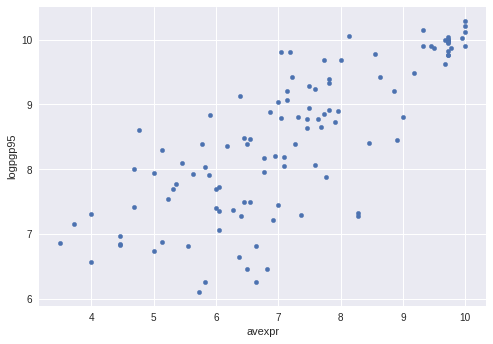

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()


$logpdp95_i = \beta_0 + \beta_1 avexpr_i + u_i$

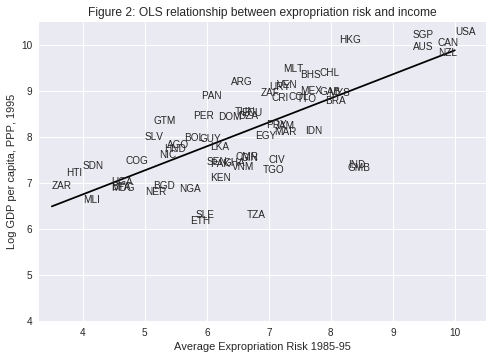

In [7]:
import numpy as np

# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])

# Use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlim([3.3,10.5])
plt.ylim([4,10.5])
plt.xlabel('Average Expropriation Risk 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.title('Figure 2: OLS relationship between expropriation risk and income')
plt.show()

To estimate the constant term $β_0$, we need to add a column of 1’s to our dataset (consider the equation if $β_0$ was replaced with $β_0 x_i$ and $x_i$=1)

We need to use .fit() to obtain parameter estimates $\quad \hat{\beta_0} \quad and \quad \hat{\beta_1}$

In [12]:
df1['const'] = 1

import statsmodels.api as sm

reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')
type(reg1)



statsmodels.regression.linear_model.OLS

In [13]:
results = reg1.fit()
type(results)


statsmodels.regression.linear_model.RegressionResultsWrapper

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Fri, 10 May 2019   Prob (F-statistic):           4.16e-24
Time:                        20:22:43   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

## Output Summary

The df(Regression) is one less than the number of parameters being estimated. There are k predictor variables and so there are k parameters for the coefficients on those variables. There is always one additional parameter for the constant so there are k+1 parameters. But the df is one less than the number of parameters, so there are k+1 - 1 = k degrees of freedom. That is, the df(Regression) = # of predictor variables.


The df(Residual) is the sample size minus the number of parameters being estimated, so it becomes df(Residual) = n - (k+1) or df(Residual) = n - k - 1. It's often easier just to use subtraction once you know the total and the regression degrees of freedom.

Df Model - depends on the rank of the design matrix and does not take a constant into account. The rank is defined by the threshold used in numpy which depends on the condition number.
**df_model = rank - k_constant**


Covariance Type - Nonrobust. In robust statistics, robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Regression analysis seeks to find the relationship between one or more independent variables and a dependent variable. Certain widely used methods of regression, such as ordinary least squares, have favourable properties if their underlying assumptions are true, but can give misleading results if those assumptions are not true; thus ordinary least squares is said to be not robust to violations of its assumptions. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process.

https://en.wikipedia.org/wiki/Robust_regression

R-squared - 1 - $\frac{Residual Sum of Squares}{Total sum of squares}$, whose value is between 0 and 1. Higher the $R^2$ better fit

Adj. R-squared - The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors. Suppose you compare a five-predictor model with a higher R-squared to a one-predictor model. Does the five predictor model have a higher R-squared because it’s better? Or is the R-squared higher because it has more predictors? Simply compare the adjusted R-squared values to find out! The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.

p-values - The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Durbin-Watson - The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.

Jarque-Bera - Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The test is named after Carlos Jarque and Anil K. Bera. The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution.

